In [84]:
import csv
import re
import matplotlib
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, colors
import matplotlib.patches as patches
from matplotlib import gridspec
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list
from scipy.spatial.distance import pdist


matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)


In [104]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutations_for_oncoprint_123_patients.txt'
df = pd.read_csv(f1, index_col='percentage')
df.head(3)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Positive,Negative,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Squamous,Squamous,Adeno,...,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Adeno
MLL3(18%),CODON_INSERTION_DELETION,NaN,NaN,NaN,Multiple,NaN,STOP_GAINED,NaN,STOP_GAINED,Multiple,...,NON_SYNONYMOUS_CODING,NaN,NON_SYNONYMOUS_CODING,NaN,STOP_GAINED,NaN,NON_SYNONYMOUS_CODING,STOP_GAINED,NON_SYNONYMOUS_CODING,NaN


In [145]:
clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]

In [106]:
df = df.sort_values(df.index.tolist(), axis=1, ascending=False).fillna(0)
df.head()

,HTMCP-03-06-02435,HTMCP-03-06-02020,HTMCP-03-06-02442,HTMCP-03-06-02428,HTMCP-03-06-02447,HTMCP-03-06-02424,HTMCP-03-06-02411,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02230,...,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02075,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02150,HTMCP-03-06-02085,HTMCP-03-06-02326
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,...,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno
MLL3(18%),STOP_GAINED,STOP_GAINED,STOP_GAINED,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,NON_SYNONYMOUS_CODING,FRAME_SHIFT,CODON_INSERTION_DELETION,0,...,Multiple,Multiple,0,0,0,0,0,0,0,0
MLL2(13%),FRAME_SHIFT,0,0,0,0,0,0,Multiple,0,NON_SYNONYMOUS_CODING,...,0,0,Multiple,0,0,0,0,0,0,0
CREBBP(8%),0,0,0,0,0,0,0,0,0,0,...,NON_SYNONYMOUS_CODING,0,0,0,0,0,0,0,0,0


In [107]:
assert len(pd.Series(df.values.ravel()).unique()) == len(clrs)

In [108]:
# s = {k: d[k] for k in sorted(d, key=d.get, reverse=False)}
map_dict1 = {0: 0.05,
 'Adeno': 0.15,
 'Squamous': 0.25,
 'Negative': 0.35,
 'Positive': 0.45,
 'NON_SYNONYMOUS_CODING': 0.55,
 'CODON_DELETION': 0.65,
 'Multiple': 0.75,
 'FRAME_SHIFT': 0.85,
 'SPLICE_ACCEPTOR_DONOR': 0.95,
 'STOP_GAINED': 1.05}

In [109]:
map_dict2 = {}
for n, k in enumerate(map_dict1.keys()):
    map_dict2[k] = clrs[n]
map_dict2

{0: 'white',
 'Adeno': 'purple',
 'Squamous': '#E69F00',
 'Negative': '#009E73',
 'Positive': '#56B4E9',
 'NON_SYNONYMOUS_CODING': '#377EB8',
 'CODON_DELETION': '#E41A1C',
 'Multiple': '#F0E442',
 'FRAME_SHIFT': 'black',
 'SPLICE_ACCEPTOR_DONOR': '#D55E00',
 'STOP_GAINED': '#CC79A7'}

In [110]:
assert list(map_dict2.values()) == clrs

In [111]:
ndf = df.apply(lambda x: x.map(map_dict1)).fillna(0)
ndf.head(4)

,HTMCP-03-06-02435,HTMCP-03-06-02020,HTMCP-03-06-02442,HTMCP-03-06-02428,HTMCP-03-06-02447,HTMCP-03-06-02424,HTMCP-03-06-02411,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02230,...,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02075,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02150,HTMCP-03-06-02085,HTMCP-03-06-02326
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35
Puatative_Histology,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
MLL3(18%),1.05,1.05,1.05,0.55,0.55,0.55,0.55,0.85,0.00,0.05,...,0.75,0.75,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
MLL2(13%),0.85,0.05,0.05,0.05,0.05,0.05,0.05,0.75,0.05,0.55,...,0.05,0.05,0.75,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [112]:
odf = df.apply(lambda x: x.map(map_dict2))
odf.head()

,HTMCP-03-06-02435,HTMCP-03-06-02020,HTMCP-03-06-02442,HTMCP-03-06-02428,HTMCP-03-06-02447,HTMCP-03-06-02424,HTMCP-03-06-02411,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02230,...,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02075,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02150,HTMCP-03-06-02085,HTMCP-03-06-02326
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,...,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73
Puatative_Histology,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,...,purple,purple,purple,purple,purple,purple,purple,purple,purple,purple
MLL3(18%),#CC79A7,#CC79A7,#CC79A7,#377EB8,#377EB8,#377EB8,#377EB8,black,NaN,white,...,#F0E442,#F0E442,white,white,white,white,white,white,white,white
MLL2(13%),black,white,white,white,white,white,white,#F0E442,white,#377EB8,...,white,white,#F0E442,white,white,white,white,white,white,white
CREBBP(8%),white,white,white,white,white,white,white,white,white,white,...,#377EB8,white,white,white,white,white,white,white,white,white


In [54]:
# # get gene list
# f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/genes.txt'
# df2 = pd.read_csv(f2)
# df2.head(2)
# genes = df2.genes.tolist()

In [55]:
# # get gene list
# # f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/genes.txt'
# f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/genes_grouped_for_oncoprint.txt'
# cdf = pd.read_csv(f2, comment="#")
# genes = cdf.genes.tolist()
# print(genes)

In [113]:
legends = sorted(map_dict1, key=map_dict1.get, reverse=False)

In [114]:
len(map_dict1)/10.0 + 0.1

1.2000000000000002

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


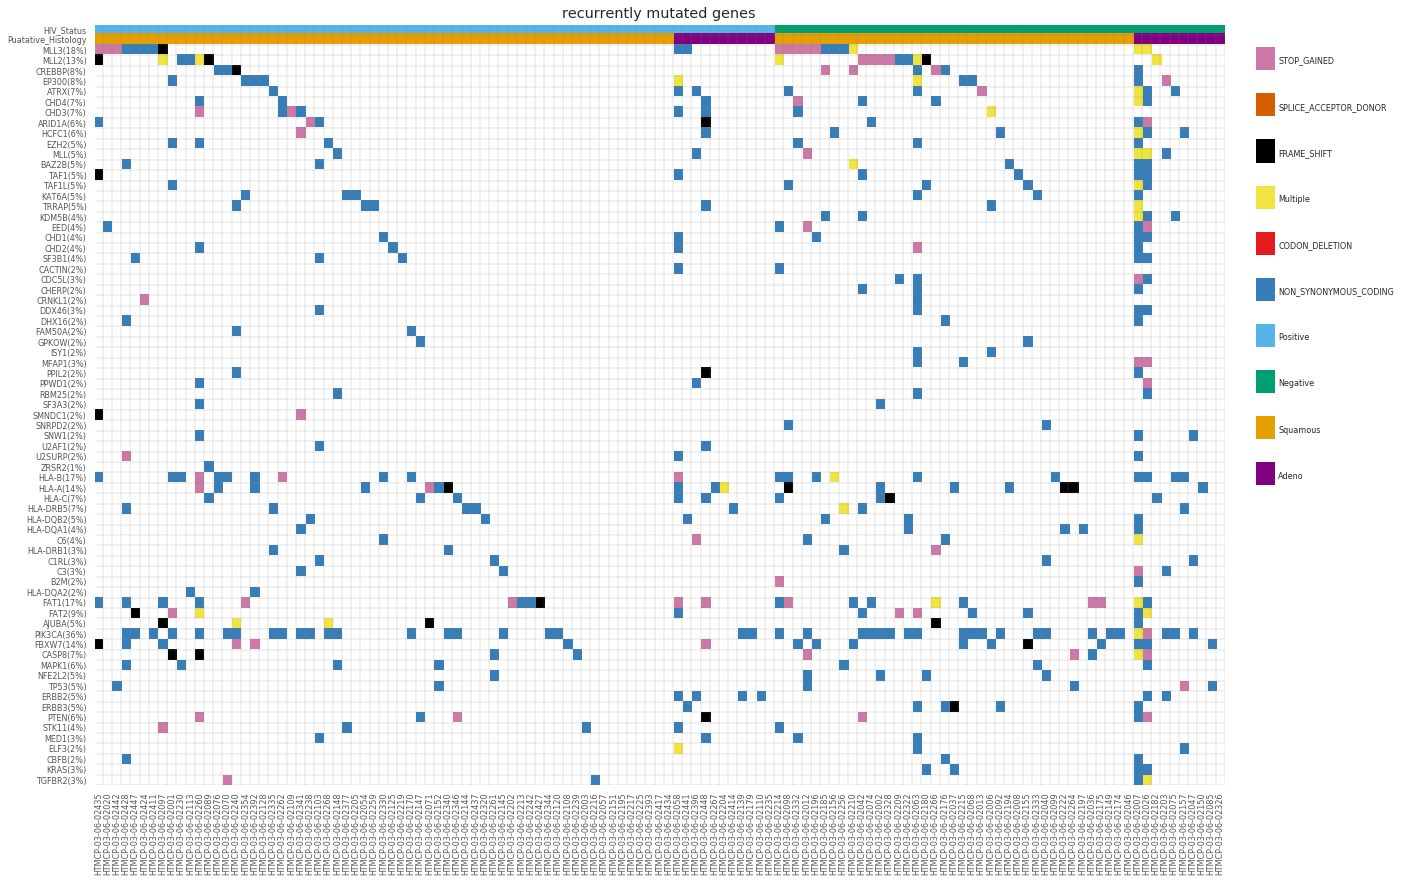

In [153]:
df = ndf.copy()
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig = plt.figure(figsize=(22, 9))
fig = plt.figure(figsize=(22, 14), facecolor='white')

gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[17,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

# clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]
# clrs = ['white',  'orange', 'purple','green',  'navy', 'red','blue', 'magenta' ]#"#0072B2",
# bounds = np.arange(0, 1.1, 0.1).tolist()
bounds = np.arange(0, len(map_dict1)/10.0 , 0.1).tolist()
assert len(bounds) == len(map_dict1)
# assert len(bounds) == len(map_dict1) + 1
# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)
nrow = len(df.index)
ncol = len(df.columns)

ax1 = fig.add_subplot(gs[0])
img = ax1.imshow(df.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)

_ = plt.yticks(np.arange(0, nrow, 1), df.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), df.columns, fontsize=8, rotation=90)

_ = ax1.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax1.set_title('recurrently mutated genes')

# add legend
gs01 = gridspec.GridSpecFromSubplotSpec(2, 1,  height_ratios=[2, 1], subplot_spec=gs[1])
ax2_1 = fig.add_subplot(gs01[0], facecolor='white')
ax2_1.set_title("mutations")


# plot mutation legend
k = -1
for key in map_dict2:
    if key !=0: # don't plot key=0 which means no mutation
        clr = map_dict2[key]
        rect = patches.Rectangle((0,k/10), 0.3, 0.05, linewidth=0.01,edgecolor=clr,facecolor=clr)
        _ = ax2_1.text(0.35, k/10+.02, key, ha='left', va='center', fontsize=8)
        _ = ax2_1.add_patch(rect)
    k+=1
ax2_1.get_xaxis().set_ticks([])
ax2_1.get_yaxis().set_ticks([])

ax2_1.set_title('')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/oncoprint_123_patients_new.png'
# %time plt.savefig(of, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

In [37]:

np.arange(0, 1.2, 0.1).tolist()

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1]

cluster patients based on if a gene mutated or not to see if i can better visualize this

In [76]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutations_for_oncoprint_123_patients.txt'
df = pd.read_csv(f1, index_col='percentage')
df.head(3)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Positive,Negative,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Squamous,Squamous,Adeno,...,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Adeno
MLL3(18%),CODON_INSERTION_DELETION,NaN,NaN,NaN,Multiple,NaN,STOP_GAINED,NaN,STOP_GAINED,Multiple,...,NON_SYNONYMOUS_CODING,NaN,NON_SYNONYMOUS_CODING,NaN,STOP_GAINED,NaN,NON_SYNONYMOUS_CODING,STOP_GAINED,NON_SYNONYMOUS_CODING,NaN


In [79]:
df[~df.isnull()] = 1
df.fillna(0, inplace=True)
df.head()

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Puatative_Histology,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MLL3(18%),1,0,0,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,1,1,0
MLL2(13%),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CREBBP(8%),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df1 = df.drop(['HIV_Status', 'Puatative_Histology'])
df1.head()

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
MLL3(18%),1,0,0,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,1,1,0
MLL2(13%),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CREBBP(8%),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EP300(8%),1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATRX(7%),0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
linkage?


In [91]:
pdist?

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


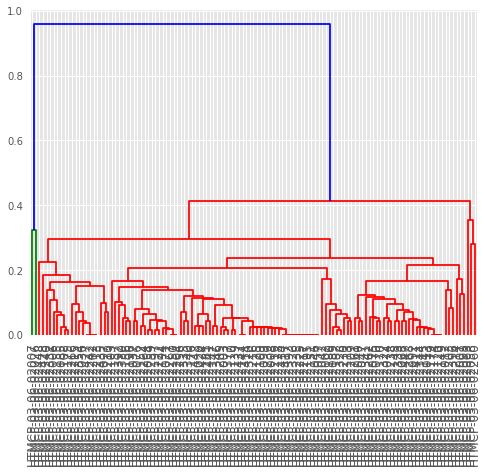

In [95]:
matrix = df1.values.T
dist='hamming'
# dist='correlation'
link='ward'
Z = linkage(pdist(matrix, dist), link)
aa = dendrogram(Z, leaf_rotation=90.,labels = df1.columns,leaf_font_size=12.,show_contracted=True)#
den_labels = aa['ivl']
adf = pd.DataFrame(den_labels)

In [100]:
mdf = ndf[den_labels]
mdf.head()

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02448,HTMCP-03-06-02428,HTMCP-03-06-02240,HTMCP-03-06-02332,HTMCP-03-06-02006,HTMCP-03-06-02155,HTMCP-03-06-02085,HTMCP-03-06-02108,...,HTMCP-03-06-02149,HTMCP-03-06-02012,HTMCP-03-06-02203,HTMCP-03-06-02396,HTMCP-03-06-02214,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02063,HTMCP-03-06-02058,HTMCP-03-06-02260
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,0.35,0.35,0.45,0.45,0.45,0.35,0.35,0.35,0.35,0.45,...,0.35,0.35,0.35,0.45,0.35,0.45,0.35,0.35,0.45,0.45
Puatative_Histology,0.15,0.15,0.15,0.25,0.25,0.25,0.25,0.25,0.15,0.25,...,0.25,0.25,0.15,0.15,0.25,0.25,0.25,0.25,0.15,0.25
MLL3(18%),0.75,0.75,0.05,0.55,0.05,1.05,0.05,0.05,0.05,0.05,...,0.05,1.05,0.05,0.05,1.05,0.00,1.05,0.05,0.55,0.05
MLL2(13%),0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.75,0.05,0.05,0.75,0.05,0.75
CREBBP(8%),0.55,0.05,0.05,0.05,0.85,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


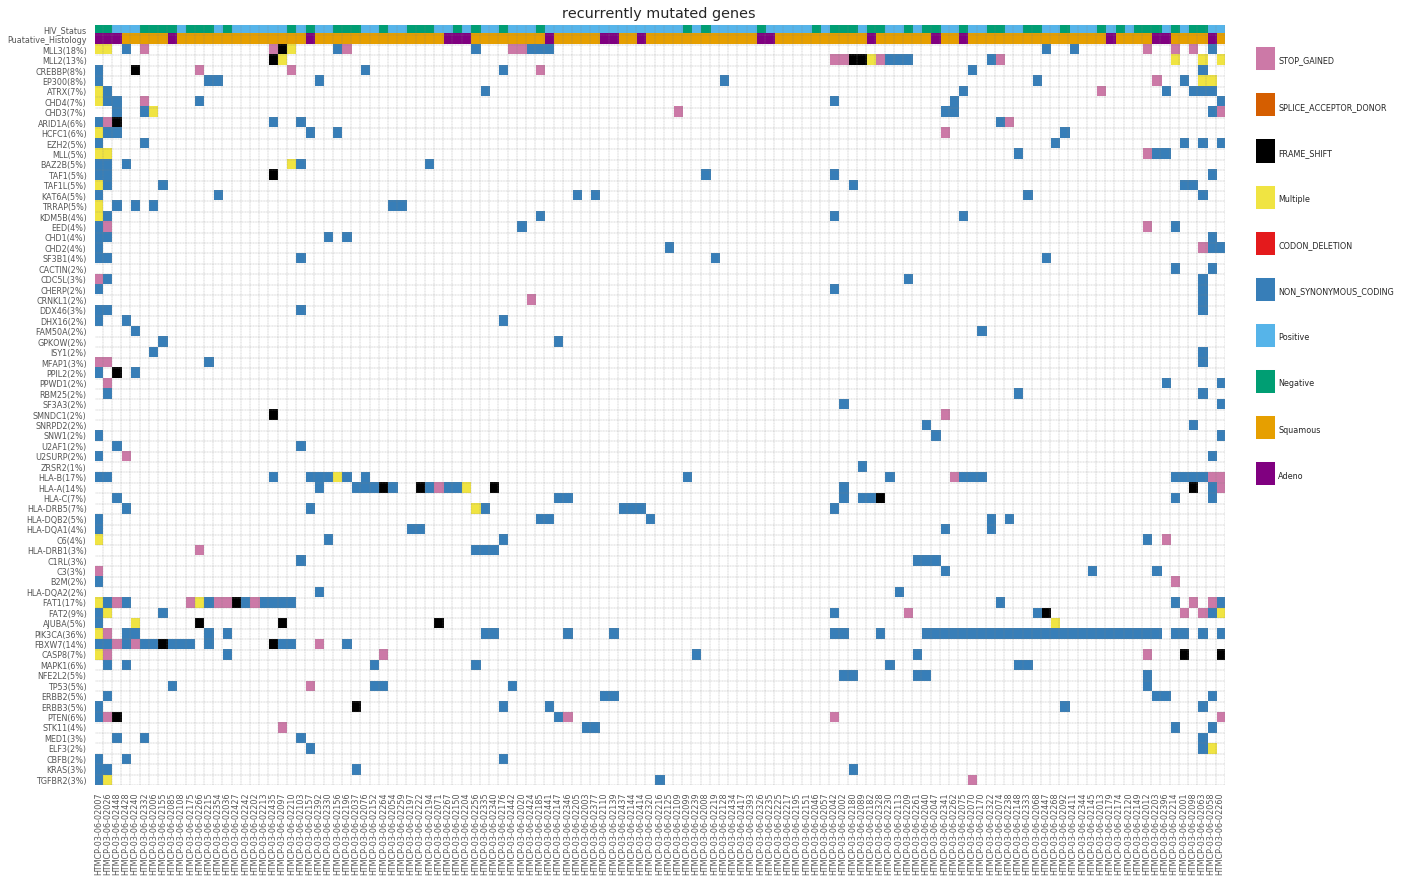

In [101]:
df = mdf.copy()
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig = plt.figure(figsize=(22, 9))
fig = plt.figure(figsize=(22, 14), facecolor='white')

gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[17,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

# clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]
# clrs = ['white',  'orange', 'purple','green',  'navy', 'red','blue', 'magenta' ]#"#0072B2",
# bounds = np.arange(0, 1.1, 0.1).tolist()
bounds = np.arange(0, len(map_dict1)/10.0 , 0.1).tolist()
assert len(bounds) == len(map_dict1)
# assert len(bounds) == len(map_dict1) + 1
# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)
nrow = len(df.index)
ncol = len(df.columns)

ax1 = fig.add_subplot(gs[0])
img = ax1.imshow(df.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)

_ = plt.yticks(np.arange(0, nrow, 1), df.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), df.columns, fontsize=8, rotation=90)

_ = ax1.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax1.set_title('recurrently mutated genes')

# add legend
gs01 = gridspec.GridSpecFromSubplotSpec(2, 1,  height_ratios=[2, 1], subplot_spec=gs[1])
ax2_1 = fig.add_subplot(gs01[0], facecolor='white')
ax2_1.set_title("mutations")


# plot mutation legend
k = -1
for key in map_dict2:
    if key !=0: # don't plot key=0 which means no mutation
        clr = map_dict2[key]
        rect = patches.Rectangle((0,k/10), 0.3, 0.05, linewidth=0.01,edgecolor=clr,facecolor=clr)
        _ = ax2_1.text(0.35, k/10+.02, key, ha='left', va='center', fontsize=8)
        _ = ax2_1.add_patch(rect)
    k+=1
ax2_1.get_xaxis().set_ticks([])
ax2_1.get_yaxis().set_ticks([])

ax2_1.set_title('')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/oncoprint_123_patients_new.png'
# %time plt.savefig(of, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

add covariate tracks

In [125]:
# oncoprint df
onco_df = ndf.iloc[2:,:]
onco_df.head()

,HTMCP-03-06-02435,HTMCP-03-06-02020,HTMCP-03-06-02442,HTMCP-03-06-02428,HTMCP-03-06-02447,HTMCP-03-06-02424,HTMCP-03-06-02411,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02230,...,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02075,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02150,HTMCP-03-06-02085,HTMCP-03-06-02326
percentage,,,,,,,,,,,,,,,,,,,,,
MLL3(18%),1.05,1.05,1.05,0.55,0.55,0.55,0.55,0.85,0.00,0.05,...,0.75,0.75,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
MLL2(13%),0.85,0.05,0.05,0.05,0.05,0.05,0.05,0.75,0.05,0.55,...,0.05,0.05,0.75,0.05,0.05,0.05,0.05,0.05,0.05,0.05
CREBBP(8%),0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
EP300(8%),0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,...,0.55,0.05,0.05,1.05,0.05,0.05,0.05,0.05,0.05,0.05
ATRX(7%),0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.75,0.55,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05


In [131]:
patients = onco_df.columns
patients[:10]

Index(['HTMCP-03-06-02435', 'HTMCP-03-06-02020', 'HTMCP-03-06-02442',
       'HTMCP-03-06-02428', 'HTMCP-03-06-02447', 'HTMCP-03-06-02424',
       'HTMCP-03-06-02411', 'HTMCP-03-06-02097', 'HTMCP-03-06-02001',
       'HTMCP-03-06-02230'],
      dtype='object')

In [139]:
# category track df
category_track = ndf.loc[['HIV_Status', 'Puatative_Histology'],:]
category_track.head(2)

,HTMCP-03-06-02435,HTMCP-03-06-02020,HTMCP-03-06-02442,HTMCP-03-06-02428,HTMCP-03-06-02447,HTMCP-03-06-02424,HTMCP-03-06-02411,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02230,...,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02075,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02150,HTMCP-03-06-02085,HTMCP-03-06-02326
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35
Puatative_Histology,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15


In [140]:
assert (category_track.columns == patients).all()

In [177]:
inf = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
clinic = pd.read_csv(inf, sep='\t', index_col='patient')
clinic.head()

,snv_counts,indel_counts,strelka_mutations,log10_sum,HIV_status,HPV_status,Clinical_histology,Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56.0,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,[Not Available],2001.0,[Not Available],1,1,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62.0,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,[Not Available],2002.0,3,[Not Available],1,11.0,G3,70.2
HTMCP-03-06-02003,7914,483,8397,3.924124,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,39.0,...,4.0,Pre (<6 months since LMP AND no prior bilatera...,[Not Available],2003.0,[Not Available],[Not Available],1,5.0,G2,56.2
HTMCP-03-06-02006,19931,1766,21697,4.336400,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,34.0,...,2.0,Pre (<6 months since LMP AND no prior bilatera...,[Not Available],2006.0,1,[Not Available],1,3.0,G3,61.3
HTMCP-03-06-02007,2928432,29850,2958282,6.471040,Negative,Negative,Squamous Non-Keratinizing,Adeno,NaN,65.0,...,6.0,Post (prior bilateral ovariectomy OR >12 mo si...,[Not Available],2007.0,[Not Available],[Not Available],1,6.0,G3,47.1


In [178]:
clinic1 = clinic[['patient', 'log10_sum', 'age_at_diagnosis', 'cd4_counts_at_diagnosis', 
                 'clinical_stage', 'history_hormonal_contraceptives_use', 
                 'hiv_rna_load_at_diagnosis', 'total_pregnancy_count','tumor_grade']]
clinic1.head()

KeyError: "['patient'] not in index"

In [184]:
numeric_track = clinic[['log10_sum', 'age_at_diagnosis']]
numeric_track.head()

,log10_sum,age_at_diagnosis
patient,,
HTMCP-03-06-02001,4.430945,56.0
HTMCP-03-06-02002,4.221701,62.0
HTMCP-03-06-02003,3.924124,39.0
HTMCP-03-06-02006,4.336400,34.0
HTMCP-03-06-02007,6.471040,65.0


In [185]:
numeric_track['age'] = np.log10(numeric_track.age_at_diagnosis)

/home/szong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
numeric_track.drop('age_at_diagnosis', axis=1, inplace=True)

/home/szong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
numeric_track.head()

,log10_sum,age
patient,,
HTMCP-03-06-02001,4.430945,1.748188
HTMCP-03-06-02002,4.221701,1.792392
HTMCP-03-06-02003,3.924124,1.591065
HTMCP-03-06-02006,4.336400,1.531479
HTMCP-03-06-02007,6.471040,1.812913


In [188]:
numeric_track = numeric_track[patients].fillna(0)

KeyError: "Index(['HTMCP-03-06-02435', 'HTMCP-03-06-02020', 'HTMCP-03-06-02442',\n       'HTMCP-03-06-02428', 'HTMCP-03-06-02447', 'HTMCP-03-06-02424',\n       'HTMCP-03-06-02411', 'HTMCP-03-06-02097', 'HTMCP-03-06-02001',\n       'HTMCP-03-06-02230',\n       ...\n       'HTMCP-03-06-02007', 'HTMCP-03-06-02026', 'HTMCP-03-06-02182',\n       'HTMCP-03-06-02203', 'HTMCP-03-06-02075', 'HTMCP-03-06-02157',\n       'HTMCP-03-06-02047', 'HTMCP-03-06-02150', 'HTMCP-03-06-02085',\n       'HTMCP-03-06-02326'],\n      dtype='object', length=123) not in index"

In [181]:
assert (numeric_track.columns == patients).all()

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
2 123
2 123


[]

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


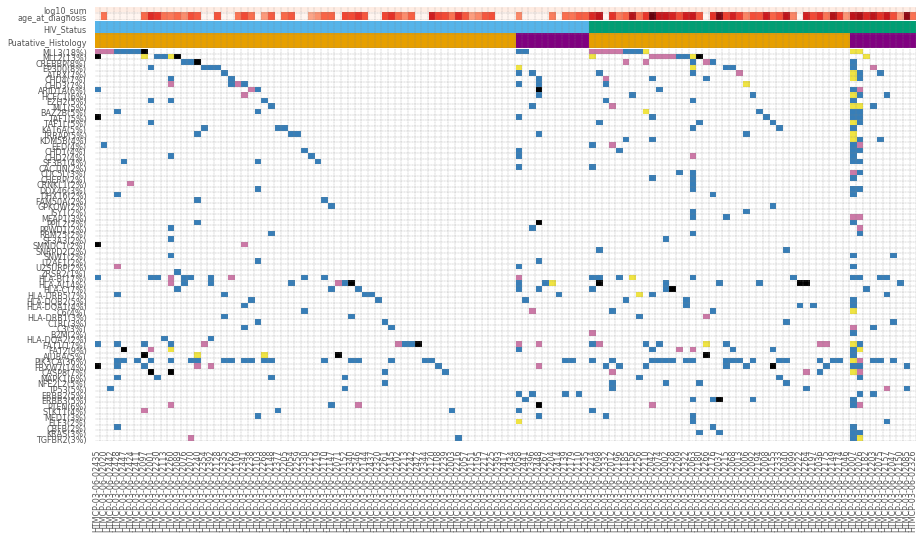

In [183]:
# def plot_cluster(numericategory_track, category_track, dfm, mark, map_dict2): # df= tracks, dfm = histone mark signal df
# input includes numericategory_track, category_track, and oncoprint dataframe
# df is oncoprint df
df = onco_df.copy()    
fig = plt.figure(figsize=(16, 8), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[17,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

bounds = np.arange(0, len(map_dict1)/10.0 , 0.1).tolist()
print(bounds)
assert len(bounds) == len(map_dict1)
# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)

# left panel 3x1 for numeric_track, c_trak, and oncoprint
gs01 = gridspec.GridSpecFromSubplotSpec(3, 1,  height_ratios=[.5, 1, 14], subplot_spec=gs[0],  hspace=0.0)

 # add oncoprint
ax1_3 = fig.add_subplot(gs01[2])
ax1_3.set_title("")
img = ax1_3.imshow(df.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)
nrow = len(df.index)
ncol = len(df.columns)
_ = plt.yticks(np.arange(0, nrow, 1), df.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), df.columns, fontsize=8, rotation=90)

_ = ax1_3.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1_3.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1_3.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1_3.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1_3.spines['right'].set_visible(True)
ax1_3.spines['top'].set_visible(True)
ax1_3.set_title('recurrently mutated genes')

# plot category track
ax1_2 = fig.add_subplot(gs01[1], facecolor='white')
#     ax1_2.set_title("")
#     print(category_track)
nrow = len(category_track.index)
ncol = len(category_track.columns)
print(nrow, ncol)
img = ax1_2.imshow(category_track.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)
_ = plt.yticks(np.arange(0, nrow, 1), category_track.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), category_track.columns, fontsize=8, rotation=90)

_ = ax1_2.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1_2.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1_2.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1_2.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1_2.spines['right'].set_visible(True)
ax1_2.spines['top'].set_visible(True)
ax1_2.set_xticklabels('')
#     print(category_track.columns)

# plot numeric track
ax1_1 = fig.add_subplot(gs01[0], facecolor='white')
#     ax1_1.set_title("")
# numeric_track = numeric_track.astype(float)
# numeric_track = pd.merge(adf, numeric_track, left_on='patient', right_index=True)#.drop(0, axis=1)
# numeric_track = numeric_track.set_index('patient')
# numeric_track = numeric_track.T
nrow = len(numeric_track.index)
ncol = len(numeric_track.columns)
print(nrow, ncol)
img1_1 = ax1_1.imshow(numeric_track.values, interpolation='none', origin='upper', aspect='auto', cmap='Reds')
_ = plt.yticks(np.arange(0, nrow, 1), numeric_track.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), numeric_track.columns, fontsize=8, rotation=90)

_ = ax1_1.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1_1.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1_1.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1_1.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1_1.spines['right'].set_visible(True)
ax1_1.spines['top'].set_visible(True)
ax1_1.set_xticklabels('')
#     print(numeric_track.columns)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
2 123


[]

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


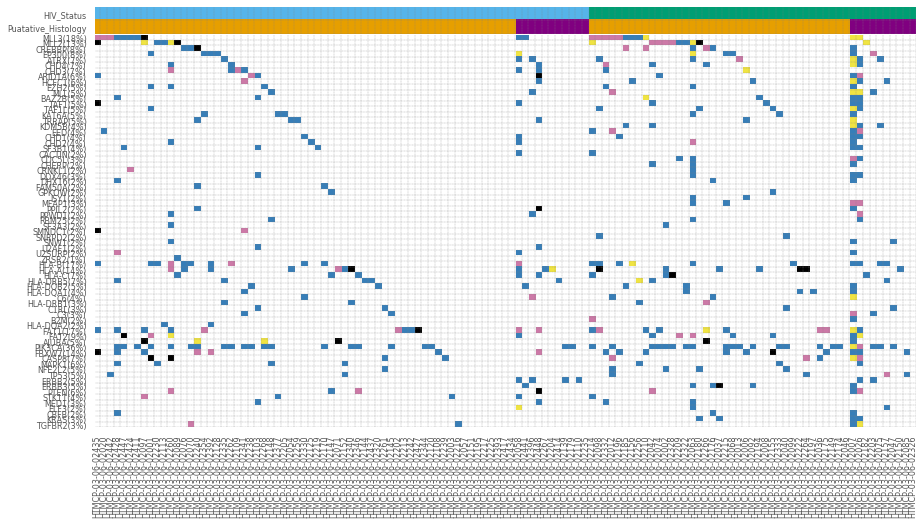

In [157]:
# right panel 2x1 for lengends, colorbar and rectangles
gs02 = gridspec.GridSpecFromSubplotSpec(2, 1,  height_ratios=[1, 1], subplot_spec=gs[1])

# color bar for numeric_track 
ax2_1 = fig.add_subplot(gs02[0], facecolor='white')
ax2_1.set_title("mutations_log10")

_ = plt.colorbar(img1_1, cax=ax2_1, orientation= 'vertical', label='')#, aspect=40) 


# add retangle legend for category track
ax2_2 = fig.add_subplot(gs02[1], facecolor='white')
ax2_2.set_title("rectangles")

#     ax6 = fig.add_subplot(gs[5], facecolor='white')
# plot mutation legend
k = 1
for key in map_dict2:
    if key !=0: # don't plot key=0 which means no mutation
        clr = map_dict2[key]
        rect = patches.Rectangle((0,k/7), 0.3, 0.1, linewidth=0.01,edgecolor=clr,facecolor=clr)
        _ = ax2_2.text(0.35, k/7+.07, key, ha='left', va='center', fontsize=8)
        _ = ax2_2.add_patch(rect)
    k+=1
ax2_2.get_xaxis().set_ticks([])
ax2_2.get_yaxis().set_ticks([])

ax2_2.set_title('')



# make sure columns in numeric, category, and dendrogram match
#     print(den_labels)
#     print(c_track.columns.tolist())
assert den_labels == c_track.columns.tolist()
assert den_labels == n_track.columns.tolist()
#     plt.tight_layout()



of = '/projects/trans_scratch/validations/workspace/szong/Cervical/chipseq/unsupervised_clustering_{}_bdg_area.png'.format(mark)
%time plt.savefig(of, bbox_inches='tight',dpi=300)
plt.show()
plt.close()